# **<h3 align="center">Machine Learning 2024-25</h3>**
## **<h3 align="center">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>**


**Group 38 members:**<br>
Ana Marta Azinheira  - 20240496@novaims.unl.pt<br>
Braulio Damba - 20240007@novaims.unl.pt<br>
Henry Tirla  - 20221016@novaims.unl.pt<br>
Marco Galão  - r20201545@novaims.unl.pt<br>
Rodrigo Sardinha - 20211627@novaims.unl.pt<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_the_libraries)
* [2. Import the Dataset](#import_the_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Inconsistencies](#inconsistencies)
    * [4.6. Outliers](#outliers)
* [5. Creating New Features](#chapter4)
    * [5.1.](#sub_section_4_2_1)
    * [5.2.](#sub_section_4_2_2)
    * [5.3.](#sub_section_4_2_3)
* [6. Correlation Matrix](#section_5_2)

# QUESTÕES
- Não consigo dividir o data set pq existem muitos missing values. 
- A forma mais correta é substituir esses Nan de forma neutra, tipo = 0, e depois dividir, e depois corrigir da melhor forma?
- Outra questão, tenho que fazer isto no train data e no test data? 

# 1. Import the Libraries <a class="anchor" id="import_the_libraries"></a>


In [321]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import bokeh as bk
import sqlite3
import os
from math import ceil

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

sns.set()

# 2. Import the DataSet <a class="anchor" id="import_the_dataset"></a>

In [322]:
df_train = pd.read_csv('../data/train_data.csv', sep=',')

In [323]:
#importing the test dataset
df_test = pd.read_csv('../data/test_data.csv', sep=',')

# 3. Description of the Dataset’s Structure <a class="anchor" id="dataset_structure"></a>

- *Accident Date* - Injury date of the claim.

- *Age at Injury* - Age of injured worker when the injury occurred.
    
- *Alternative Dispute Resolution* - Adjudication processes external to the Board.

- *Assembly Date* - The date the claim was first assembled.
    
- *Attorney/Representative* - Is the claim being represented by an Attorney?

- *Average Weekly Wage* - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.

- *Birth Year* - The reported year of birth of the injured worker.
    
- *C-2 Date* - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
    
- *C-3 Date* - Date Form C-3 (Employee Claim Form) was received.
    
- *Carrier Name* - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
    
- *Carrier Type* - Type of primary insurance provider responsible for providing workers’ compensation coverage.

- *Claim Identifier* - Unique identifier for each claim, assigned by WCB.

- *County of Injury* - Name of the New York County where the injury occurred.

- *COVID-19 Indicator* - Indication that the claim may be associated with COVID-19.

- *District Name* - Name of the WCB district office that oversees claims for that region or area of the state.

- *First Hearing Date* - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.

- *Gender* - The reported gender of the injured worker.

- *IME-4 Count* - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.

- *Industry Code* - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.

- *Industry Code Description* - 2-digit NAICS industry code description used to classify businesses according to their economic activity.

- *Medical Fee Region* - Approximate region where the injured worker would receive medical service.

- *OIICS Nature of Injury Description* - The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.

- *WCIO Cause of Injury Code* - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf

- *WCIO Cause of Injury Description* - See description of field above.

- *WCIO Nature of Injury Code* - The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf

- *WCIO Nature of Injury Description* - See description of field above.

- *WCIO Part Of Body Code* - The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf

- *WCIO Part Of Body Description* - See description of field above.

- *Zip Code* - The reported ZIP code of the injured worker’s home address.

- *Agreement Reached* - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.

- *WCB Decision* - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.

- *Claim Injury Type* - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

# 4. Exploring the DataSet <a class="anchor" id="exploration"></a>

In [324]:
df_train.shape

(593471, 33)

In [325]:
df_train.head().T

,0,1,2,3,4
Accident Date,2019-12-30,2019-08-30,2019-12-06,NaN,2019-12-30
Age at Injury,31.0,46.0,40.0,NaN,61.0
Alternative Dispute Resolution,N,N,N,NaN,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,Y,N,NaN,N
Average Weekly Wage,0.0,1745.93,1434.8,NaN,NaN
Birth Year,1988.0,1973.0,1979.0,NaN,1958.0
C-2 Date,2019-12-31,2020-01-01,2020-01-01,NaN,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF,NaN,STATE INSURANCE FUND


In [326]:
df_train.tail().T

,593466,593467,593468,593469,593470
Accident Date,NaN,2022-12-13,NaN,NaN,NaN
Age at Injury,NaN,72.0,NaN,NaN,NaN
Alternative Dispute Resolution,NaN,N,NaN,NaN,NaN
Assembly Date,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31
Attorney/Representative,NaN,N,NaN,NaN,NaN
Average Weekly Wage,NaN,0.0,NaN,NaN,NaN
Birth Year,NaN,1950.0,NaN,NaN,NaN
C-2 Date,NaN,2022-12-31,NaN,NaN,NaN
C-3 Date,NaN,NaN,NaN,NaN,NaN
Carrier Name,NaN,TECHNOLOGY INSURANCE CO. INC.,NaN,NaN,NaN


In [327]:
#checking the data types of the variables of the training dataset and if there are any missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

- From this information, we can see that the variables 'Assembly Date' and 'Claim Identifier' have no missing values.

In [328]:
#getting the main descriptive statistics only for the numerical variables

df_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.11,1.426000e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.09,6.092920e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.77,4.146400e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,23667598.79,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.21,2.830000e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.65,1.964000e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.38,2.587000e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.01,2.221000e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.74,2.237000e+01,-9.0,33.0,38.0,53.0,99.0


<br>

- 'Claim Identifier': set it as the df index (and check for duplicates)

- convert to integer:
    - 'Age at Injury': also explore min and max & check consistency with 'Birth Year'
    - 'Birth Year': also explore zeros & treat outliers (born in 2018)
    - 'IME-4 Count': also treat outlier
    - 'Industry Code': also check consistency with the link
    - 'Number of Dependents': not in metadata (make assumption) & seems uniformly distributed (strange - similar number of workers with 4, 5 or 6 dependents and workers with 0 or 1 dependents)

- special missing values:
    - 'OIICS Nature of Injury Description': full of missing values (drop this column)

- 'Average Weekly Wage': explore wage of 0 & treat outliers
- 'WCIO Cause of Injury Code': explore codes meaning (link doesn't work) & check consistency with 'WCIO Cause of Injury Description'
- 'WCIO Part Of Body Code': explore codes meaning (link doesn't work) & treat outliers (can accept negative codes?) & check consistency with 'WCIO Part Of Body Description'
- 'Agreement Reached': seems okay (missing value at the start of the claim)


In [329]:
# getting the main descriptive statistics for the remaining cathegorical variables

df_train.describe(include = ['object']).T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


<br>

- convert to datetime (check if dates are from the start of 2020 till the end of 2022):
    - 'Accident Date'
    - 'Assembly Date'
    - 'C-2 Date'
    - 'C-3 Date'
    - 'First Hearing Date' (missing values: a blank date means the claim has not yet had a hearing held)

- convert to binary:
    - 'Alternative Dispute Resolution': maybe the 'U's represent missing values (we can make this assumption)
    - 'Attorney/Representative'
    - 'COVID-19 Indicator'

- special missing values:
    - 'Carrier Type': replace 'UNKNOWN' (maybe also '5D. SPECIAL FUND - UNKNOWN') & explore online (for example, do the code represents a category)
    - 'Gender': explore values 'U' and 'X' (maybe 'U' means Unknown or Unspecified, and 'X' refers to Non-Binary, Gender X, or Other gender identities) - make assumptions
    - 'Medical Fee Region': explore values & 'UK' maybe stands for Unknown or Unclassified


- 'Claim Injury Type': seems okay (just need to understand the different values)
- 'Carrier Name': explore (for example, check if the same insurance provider is written differently)
- 'County of Injury': seems okay (just need to explore the different values)
- 'District Name': seems okay (just need to explore if the values correspond to NY districts)
- 'Industry Code Description': seems okay (just need to check consistency with the link of 'Industry Code')
- 'WCIO Cause of Injury Description': seems okay (just need to explore values & check consistency with 'WCIO Cause of Injury Code')
- 'WCIO Part Of Body Description': seems okay (just need to explore values & check consistency with 'WCIO Part Of Body Code')
- 'Zip Code': seems okay (just need to explore values)
- 'WCB Decision': just 'Not Work Related', which is not stated in the metadata (missing value at the start of the claim, because requires WCB deliberation)

In [330]:
df_train["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [331]:
df_train["Alternative Dispute Resolution"].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [332]:
df_train["Carrier Name"].value_counts()

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64

In [333]:
df_train["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [334]:
df_train["County of Injury"].value_counts()

County of Injury
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: count, Length: 63, dtype: int64

In [335]:
df_train["COVID-19 Indicator"].value_counts()

COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64

In [336]:
df_train["District Name"].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [337]:
df_train["Gender"].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

In [338]:
df_train["Industry Code Description"].value_counts()

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               114339
PUBLIC ADMINISTRATION                                            92240
RETAIL TRADE                                                     61638
TRANSPORTATION AND WAREHOUSING                                   54023
EDUCATIONAL SERVICES                                             44393
MANUFACTURING                                                    38150
CONSTRUCTION                                                     30903
ACCOMMODATION AND FOOD SERVICES                                  26456
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     21027
WHOLESALE TRADE                                                  15236
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    13149
ARTS, ENTERTAINMENT, AND RECREATION                               9967
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9770
INFORMATION                                        

In [339]:
df_train["Medical Fee Region"].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

In [340]:
df_train["WCIO Cause of Injury Description"].value_counts()

WCIO Cause of Injury Description
LIFTING                                   46610
FELLOW WORKER, PATIENT OR OTHER PERSON    37153
STRAIN OR INJURY BY, NOC                  33192
FALL, SLIP OR TRIP, NOC                   31733
ON SAME LEVEL                             29364
                                          ...  
MOLD                                         55
ABNORMAL AIR PRESSURE                        51
CRASH OF WATER VEHICLE                       45
RADIATION                                    34
CRASH OF AIRPLANE                            12
Name: count, Length: 74, dtype: int64

In [341]:
df_train["WCIO Part Of Body Description"].value_counts()

WCIO Part Of Body Description
LOWER BACK AREA                                          51862
KNEE                                                     47903
MULTIPLE                                                 42011
SHOULDER(S)                                              37811
FINGER(S)                                                36093
HAND                                                     31388
ANKLE                                                    24928
MULTIPLE BODY PARTS (INCLUDING BODY                      22608
SOFT TISSUE                                              19703
FOOT                                                     18765
WRIST                                                    18750
LOWER ARM                                                15372
LUNGS                                                    14000
EYE(S)                                                   12975
THUMB                                                    12525
LOWER LEG                

In [342]:
df_train["Zip Code"].value_counts()

Zip Code
11236      3302
10940      2971
11717      2807
11434      2759
11706      2728
           ... 
09603         1
13125         1
75038.0       1
14507.0       1
07122         1
Name: count, Length: 10060, dtype: int64

# 4.0. Set Index <a id="set_index"></a>

First, let's check if "Claim Identifier" is appropriate for index

In [343]:
df_train["Claim Identifier"].isna().sum()

0

**Conclusion:** No missing values

In [344]:
df_train["Claim Identifier"].duplicated().sum()

1

**Conclusion:** 2 observations with the same "Claim Identifier". Let's analyze these observations

In [345]:
duplicated_claim_identifier = df_train[df_train.duplicated(subset="Claim Identifier", keep=False)]
duplicated_claim_identifier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 257901 to 526445
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Accident Date                       0 non-null      object 
 1   Age at Injury                       0 non-null      float64
 2   Alternative Dispute Resolution      0 non-null      object 
 3   Assembly Date                       2 non-null      object 
 4   Attorney/Representative             0 non-null      object 
 5   Average Weekly Wage                 0 non-null      float64
 6   Birth Year                          0 non-null      float64
 7   C-2 Date                            0 non-null      object 
 8   C-3 Date                            0 non-null      object 
 9   Carrier Name                        0 non-null      object 
 10  Carrier Type                        0 non-null      object 
 11  Claim Identifier                    2 non-nu

In [346]:
duplicated_claim_identifier["Assembly Date"]

257901    2021-05-21
526445    2022-09-05
Name: Assembly Date, dtype: object

**Conclusion:** The observations have missing values in all variables, except in "Assembly Date" (different dates). As these observations are useless, we should drop them

In [347]:
# Drop all duplicates based on "Claim Identifier"
df_train_no_duplicated_claim_identifier = df_train[~df_train.duplicated(subset="Claim Identifier", keep=False)]
df_train_no_duplicated_claim_identifier["Claim Identifier"].duplicated().sum()

0

Now that there are no "Claim Identifier" duplicates, we can set it as the DataFrame index

In [348]:
df_train_index = df_train_no_duplicated_claim_identifier.set_index("Claim Identifier")
df_train_index.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


# 4.1. Univariate Features <a id="constant_feature"></a>

In [349]:
variances = df_train_index.var(numeric_only=True)
variances[variances == 0]

Series([], dtype: float64)

**Conclusion**: There are no univariate features

# 4.2. Duplicates

In [350]:
# Check for duplicated observations
df_train_index.duplicated().sum()

18348

**Conclusion:** There are a lot of duplicated observations. Let's analyze them

In [351]:
duplicates = df_train_index[df_train_index.duplicated()]
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18348 entries, 363651794 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Accident Date                       0 non-null      object 
 1   Age at Injury                       1 non-null      float64
 2   Alternative Dispute Resolution      1 non-null      object 
 3   Assembly Date                       18348 non-null  object 
 4   Attorney/Representative             1 non-null      object 
 5   Average Weekly Wage                 1 non-null      float64
 6   Birth Year                          1 non-null      float64
 7   C-2 Date                            0 non-null      object 
 8   C-3 Date                            1 non-null      object 
 9   Carrier Name                        1 non-null      object 
 10  Carrier Type                        1 non-null      object 
 11  Claim Injury Type                 

**Conclusion:** Let's check if the value 1 in non-null data is related to the same observation

In [352]:
# Count the number of non-null values in each row, excluding 'Assembly Date'
non_null_count = duplicates.drop(columns=['Assembly Date']).notna().sum(axis=1)

# Filter for rows where there are non-null values
rows_with_non_null = duplicates[non_null_count > 0]

# Check unique indices of the rows with non-null values
unique_indices = rows_with_non_null.index.unique().to_list()

# Display the unique indices
print(unique_indices)

[5686771]


In [353]:
df_train_index.loc[unique_indices].T

Claim Identifier,5686771
Accident Date,NaN
Age at Injury,0.0
Alternative Dispute Resolution,N
Assembly Date,2021-03-25
Attorney/Representative,Y
Average Weekly Wage,0.0
Birth Year,1968.0
C-2 Date,NaN
C-3 Date,2021-03-16
Carrier Name,ACE AMERICAN INSURANCE CO


**Conclusion:** Just 1 observation, from the duplicates, doesn't have missing values in all variables (excluding 'Assembly Date'). Therefore, we will just keep this observation and drop the others

In [354]:
# Drop all duplicates
df_train_no_duplicates = df_train_index.drop_duplicates(keep=False)

# Re-add the observation to keep
df_train_no_duplicates = pd.concat([df_train_no_duplicates, df_train_index.loc[unique_indices]])

In [355]:
# Check if we dropped the correct number of observations 
len(df_train_no_duplicates) == len(df_train_index) - df_train_index.duplicated(keep=False).sum() + 1

True

# 4.3. Missing Values

- columns with just missing values:
  - 'OIICS Nature of Injury Description'
- hidden missing values:
  - 'Carrier Type'
  - 'Gender'
  - 'Medical Fee Region'
  - 'Alternative Dispute Resolution'

Drop column "OIICS Nature of Injury Description", because it has only missing values

In [356]:
df_train_treat_missing = df_train_no_duplicates.copy()

In [357]:
df_train_treat_missing["OIICS Nature of Injury Description"].value_counts(dropna=False, normalize=True) * 100

OIICS Nature of Injury Description
NaN    100.0
Name: proportion, dtype: float64

In [358]:
df_train_treat_missing.drop(columns=["OIICS Nature of Injury Description"], inplace=True)

In [359]:
"OIICS Nature of Injury Description" in df_train_treat_missing.columns

False

Check hidden missing values

In [360]:
df_train_treat_missing["Carrier Type"].value_counts(dropna=False, normalize=True) * 100

Carrier Type
1A. PRIVATE                                    49.713340
3A. SELF PUBLIC                                21.239493
2A. SIF                                        19.362223
4A. SELF PRIVATE                                9.196115
UNKNOWN                                         0.309046
5D. SPECIAL FUND - UNKNOWN                      0.178215
5C. SPECIAL FUND - POI CARRIER WCB MENANDS      0.000871
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)     0.000697
Name: proportion, dtype: float64

**Decision:** 'UNKNOWN' indicates that the type of the insurance provider was unavailable or not recorded at the time the data was collected, so it should be replaced with pd.NA

In [361]:
df_train_treat_missing["Gender"].value_counts(dropna=False, normalize=True) * 100

Gender
M    58.397631
F    40.773660
U     0.820696
X     0.008014
Name: proportion, dtype: float64

**Decision:** Considering both ‘U’ and ‘X’ as missing values seems a reasonable approach, because they represent very small percentages. This way, we minimize assumptions about the data and maintain a focus on the primary gender categories

In [362]:
df_train_treat_missing["Medical Fee Region"].value_counts(dropna=False, normalize=True) * 100

Medical Fee Region
IV     46.336135
I      23.672314
II     14.813466
III     9.346980
UK      5.831105
Name: proportion, dtype: float64

**Decision:** 'UK' likely refers to 'Unknown'. Therefore, replacing 'UK' with pd.NA allows subsequent analyses to focus on the regions that are known (I, II, III, IV) without the influence of ambiguous entries

In [363]:
df_train_treat_missing["Alternative Dispute Resolution"].value_counts(dropna=False, normalize=True) * 100

Alternative Dispute Resolution
N    99.544619
Y     0.454510
U     0.000871
Name: proportion, dtype: float64

**Decision:** Treating 'U' as a missing value (pd.NA) seems a good approach given the binary context of the variable and the low frequency of this value. This will help in maintaining data integrity and ensuring that our analysis is accurate and meaningful

In [364]:
# Filter the DataFrame for rows containing missing values
df_missing = df_train_treat_missing[df_train_treat_missing.isna().any(axis=1)]

# Display the filtered DataFrame
df_missing.head().T

Claim Identifier,5393875,5393889,5393887,5393863,5393848
Accident Date,2019-12-30,2019-12-06,2019-12-30,2019-12-26,2019-12-28
Age at Injury,31.0,40.0,61.0,67.0,48.0
Alternative Dispute Resolution,N,N,N,N,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,N,N,N,N
Average Weekly Wage,0.0,1434.8,NaN,0.0,0.0
Birth Year,1988.0,1979.0,1958.0,1952.0,1971.0
C-2 Date,2019-12-31,2020-01-01,2019-12-31,2019-12-31,2019-12-31
C-3 Date,NaN,NaN,NaN,NaN,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,INDEMNITY INSURANCE CO OF,STATE INSURANCE FUND,INDEMNITY INS. OF N AMERICA,LM INSURANCE CORP


**Conclusion:** The missing values in the original DataFrame are represented as np.nan. To ensure consistency throughout our dataset, we will standardize the representation of missing values (as np.nan)

In [365]:
df_train_treat_missing["Carrier Type"].replace("UNKNOWN", np.nan, inplace=True)
df_train_treat_missing["Gender"].replace(["U", "X"], np.nan, inplace=True)
df_train_treat_missing["Medical Fee Region"].replace("UK", np.nan, inplace=True)
df_train_treat_missing["Alternative Dispute Resolution"].replace("U", np.nan, inplace=True)

In [366]:
# Calculate the percentage of missing values in each column
perc_missing_values = (df_train_treat_missing.isna().sum() / len(df_train_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

IME-4 Count                          76.86
First Hearing Date                   73.73
C-3 Date                             67.38
Medical Fee Region                    5.83
Birth Year                            5.07
Zip Code                              4.99
Average Weekly Wage                   4.99
WCIO Part Of Body Description         2.98
WCIO Part Of Body Code                2.98
WCIO Nature of Injury Code            2.73
WCIO Nature of Injury Description     2.73
WCIO Cause of Injury Code             2.72
WCIO Cause of Injury Description      2.72
C-2 Date                              2.54
Industry Code                         1.73
Industry Code Description             1.73
Gender                                0.83
Accident Date                         0.64
Carrier Type                          0.31
dtype: float64

Check the percentage and cumulative percentage of rows in the DataFrame based on the number of missing values

In [367]:
# Count the number of missing values per row
missing_counts = df_train_treat_missing.isna().sum(axis=1)

# Calculate the percentage of rows for each missing count
missing_percentage = missing_counts.value_counts(normalize=True).sort_index() * 100

# Calculate the cumulative percentage
cumulative_percentage = missing_percentage.cumsum()

# Create a DataFrame to display both percentages and cumulative percentages
results_df = pd.DataFrame({
    'Rows (%)': missing_percentage.round(2),
    'Cumulative Rows (%)': cumulative_percentage.round(2)
})

# Set the index to the percentage of missing values
results_df.index.name = 'Missing Values'

# Display the results
results_df

,Rows (%),Cumulative Rows (%)
Missing Values,,
0,10.92,10.92
1,12.06,22.98
2,13.85,36.83
3,48.69,85.53
4,10.44,95.97
5,1.22,97.19
6,0.13,97.31
7,0.05,97.36
8,0.08,97.44


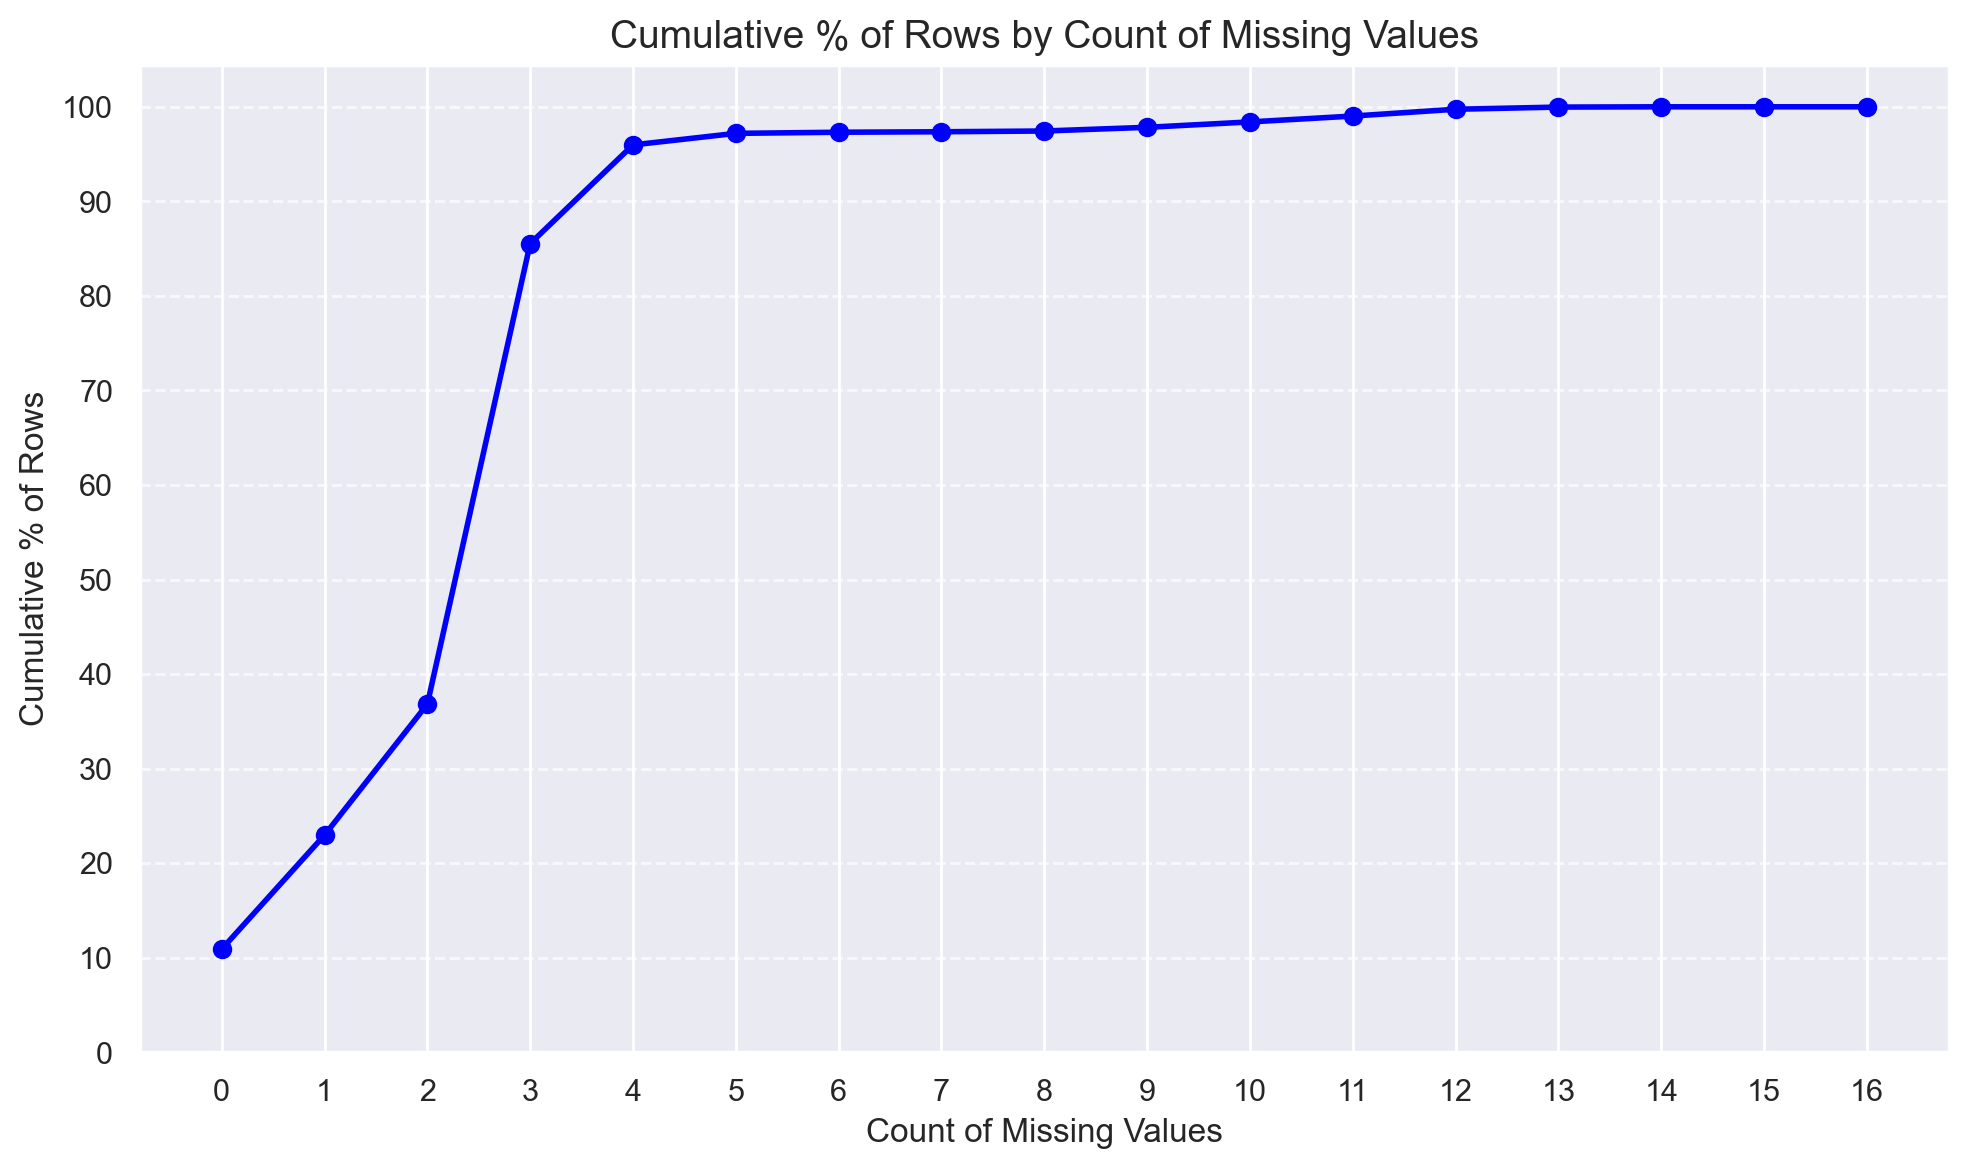

In [368]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the cumulative percentage as a line chart
plt.plot(results_df.index, results_df['Cumulative Rows (%)'], color='blue', marker='o', linewidth=2)

# Add labels and title
plt.title('Cumulative % of Rows by Count of Missing Values', fontsize=14)
plt.xlabel('Count of Missing Values', fontsize=12)
plt.ylabel('Cumulative % of Rows', fontsize=12)

# Set x-ticks to match the index and y-ticks from 0 to 100%
plt.xticks(results_df.index)
plt.yticks(range(0, 101, 10))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [369]:
# Count the number of missing values per row
missing_counts = df_train_treat_missing.isna().sum(axis=1)

# Calculate the percentage of missing values per row
total_columns = df_train_treat_missing.shape[1]  # Total number of columns
missing_value_percentage_per_row = (missing_counts / total_columns) * 100

# Calculate the percentage of rows for each unique missing value percentage
missing_percentage = pd.Series(missing_value_percentage_per_row.round(2)).value_counts(normalize=True).sort_index() * 100

# Calculate the cumulative percentage
cumulative_percentage = missing_percentage.cumsum()

# Create a DataFrame to display the percentage of missing values and cumulative percentages
results_df = pd.DataFrame({
    'Rows (%)': missing_percentage.round(2),
    'Cumulative Rows (%)': cumulative_percentage.round(2)
})

# Set the index to the percentage of missing values
results_df.index.name = 'Missing Values (%)'

# Display the results
results_df

,Rows (%),Cumulative Rows (%)
Missing Values (%),,
0.00,10.92,10.92
3.23,12.06,22.98
6.45,13.85,36.83
9.68,48.69,85.53
12.90,10.44,95.97
16.13,1.22,97.19
19.35,0.13,97.31
22.58,0.05,97.36
25.81,0.08,97.44


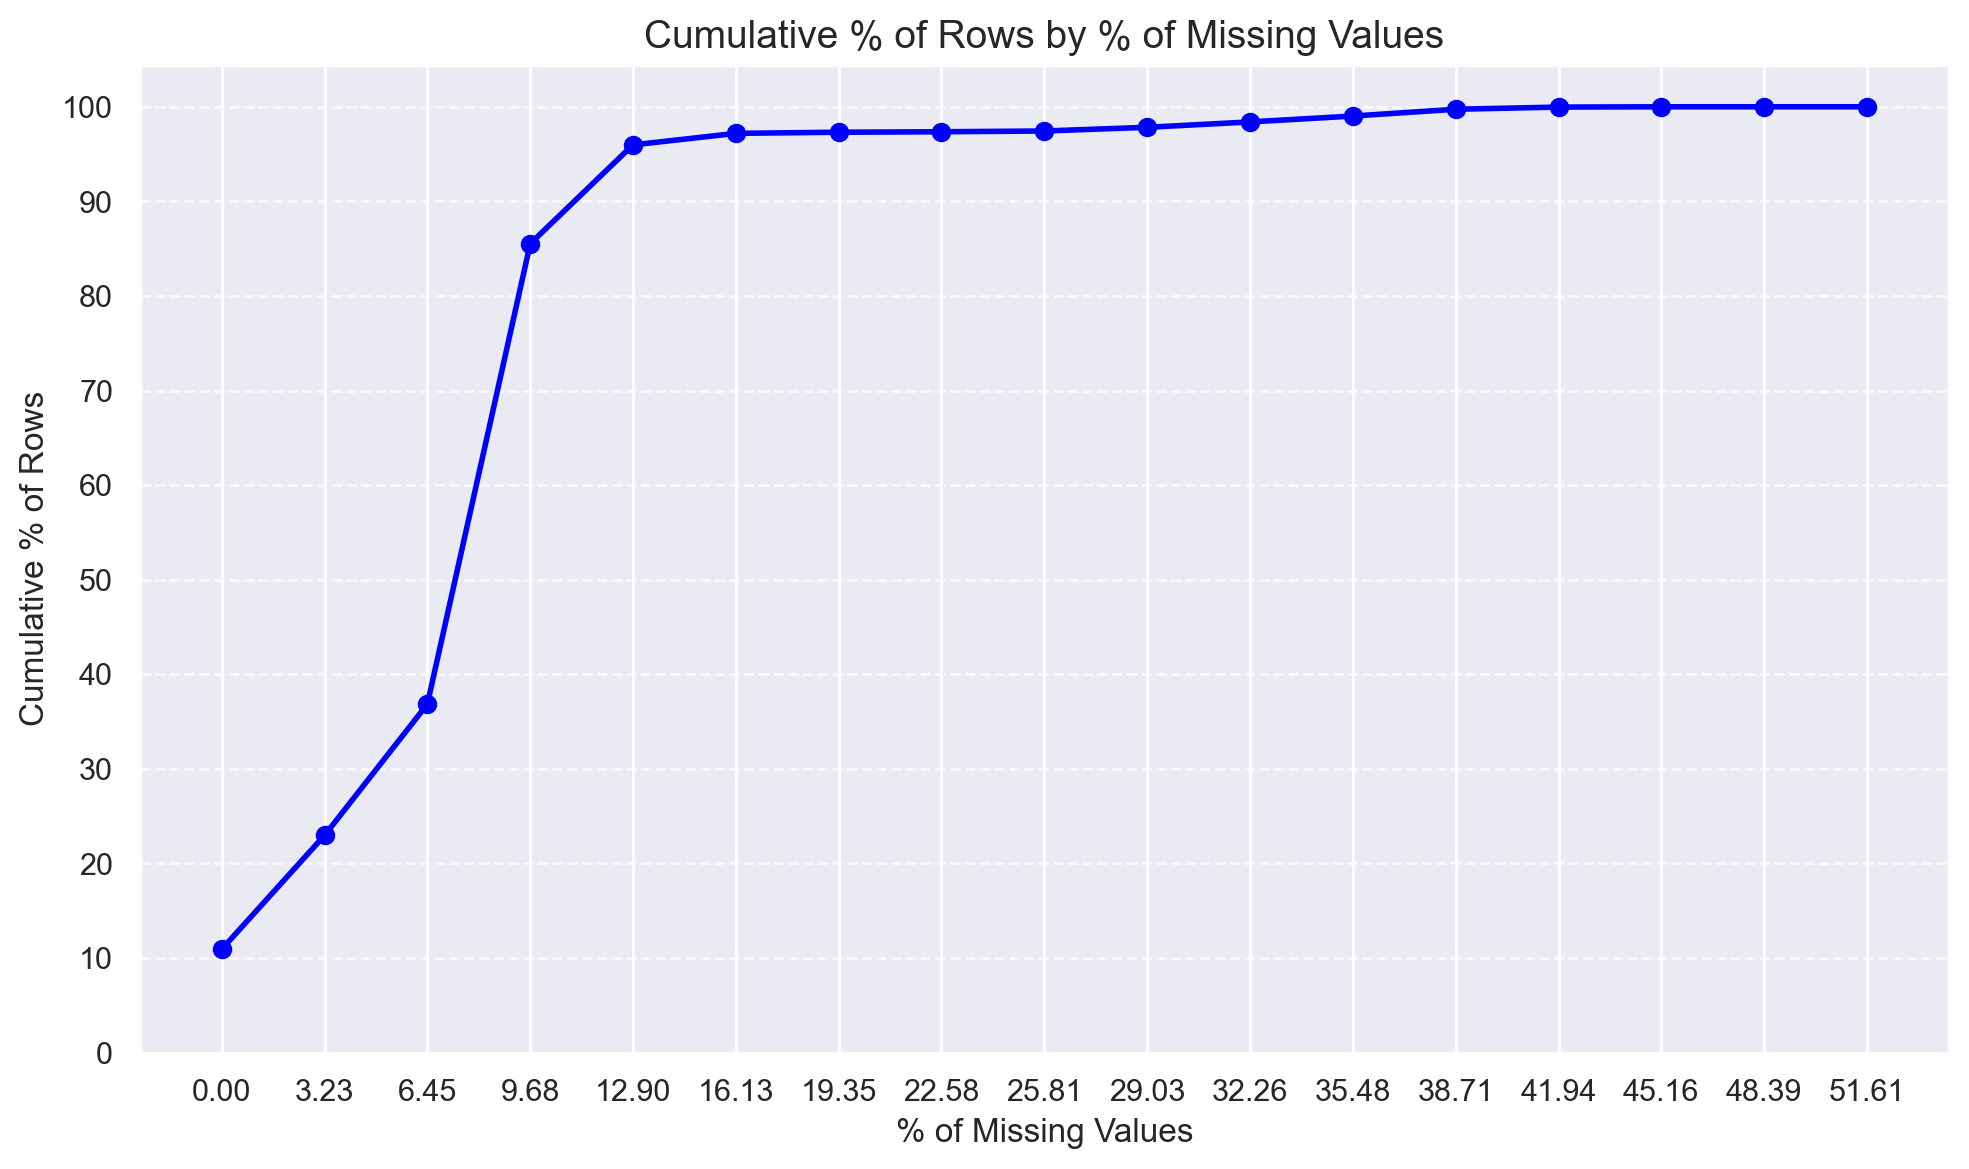

In [370]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the cumulative percentage as a line chart
plt.plot(results_df.index, results_df['Cumulative Rows (%)'], color='blue', marker='o', linewidth=2)

# Add labels and title
plt.title('Cumulative % of Rows by % of Missing Values', fontsize=14)
plt.xlabel('% of Missing Values', fontsize=12)
plt.ylabel('Cumulative % of Rows', fontsize=12)

# Set x-ticks to match the index and y-ticks from 0 to 100%
plt.xticks(results_df.index)
plt.yticks(range(0, 101, 10))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

"As a general rule of thumb, only features that are missing in excess of 60% of their values should be considered for complete removal, so, in this case, we should not remove the observations" (Fundamentals of Machine Learning for Predictive Data Analytics Algorithms).

- Following the rule, we could exclude 'C-3 Date' and 'OIICS Nature of Injury Description'

In [375]:
df_train_treat_missing["C-3 Date"].value_counts(dropna=False, normalize=True)

C-3 Date
NaN           0.673805
2021-04-21    0.000610
2020-02-10    0.000605
2020-10-26    0.000605
2020-09-23    0.000601
                ...   
2019-04-04    0.000002
2019-12-09    0.000002
2019-03-28    0.000002
2019-04-03    0.000002
2019-07-03    0.000002
Name: proportion, Length: 1649, dtype: float64

In [371]:
# dropping columns with more than 60% NaN
#verificar se isso é uma percentagem relevante 

threshold = 0.6 * len(df_train_treat_missing)

# Drop columns where more than 60% of the data is NaN
train_data_cleaned = df_train_treat_missing.dropna(thresh=len(df_train) - threshold, axis=1)

In [372]:
len(df_train_treat_missing)

574025

In [376]:
df_train_treat_missing.shape

(574025, 31)

In [373]:
len(train_data_cleaned)

574025

In [377]:
train_data_cleaned.shape

(574025, 28)

# 4.4 Data Types

- object to datetime:
  - 'Accident Date'
  - 'Assembly Date'
  - 'C-2 Date'
  - 'C-3 Date'
  - 'First Hearing Date' (missing values: a blank date means the claim has not yet had a hearing held)

- float to integer:
  - 'Age at Injury'
  - 'Birth Year'
  - 'IME-4 Count'
  - 'Number of Dependents': not in metadata (make assumption)

- object to binary:
  - 'Alternative Dispute Resolution'
  - 'Attorney/Representative'
  - 'COVID-19 Indicator'

In [ ]:
df_train_treat_missing.dtypes

Accident Date                         object
Age at Injury                        float64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                           float64
C-2 Date                              object
C-3 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
First Hearing Date                    object
Gender                                object
IME-4 Count                          float64
Industry Code                        float64
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code            float64
WCIO Cause

In [ ]:
# Step 1: Convert multiple object columns to datetime
columns_object_to_datetime = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Converts invalid dates to NaT

# Step 2: Convert multiple float columns to integers
columns_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']
for col in float_columns:
    df[col] = df[col].astype('Int64')  # Use 'Int64' for nullable integer type

# Step 3: Convert multiple object columns to binary
columns_object_to_binary = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
for col in binary_columns:
    df[col] = df[col].map({'Y': 1, 'N': 0})  # Converts invalid dates to NaT

# Display the processed DataFrame
print("\nProcessed DataFrame:")
print(df.head().T)

# Check data types
print("\nData Types:")
print(df.dtypes)

# 4.5. Inconsistencies

- from the start of 2020 till the end of 2022

# 4.6. Outliers

In [48]:
df_train['Age at Injury'].describe().round(2)

count    593471.00
mean         42.11
std          14.02
min           0.00
25%          31.00
50%          42.00
75%          53.00
max         117.00
Name: Age at Injury, dtype: float64

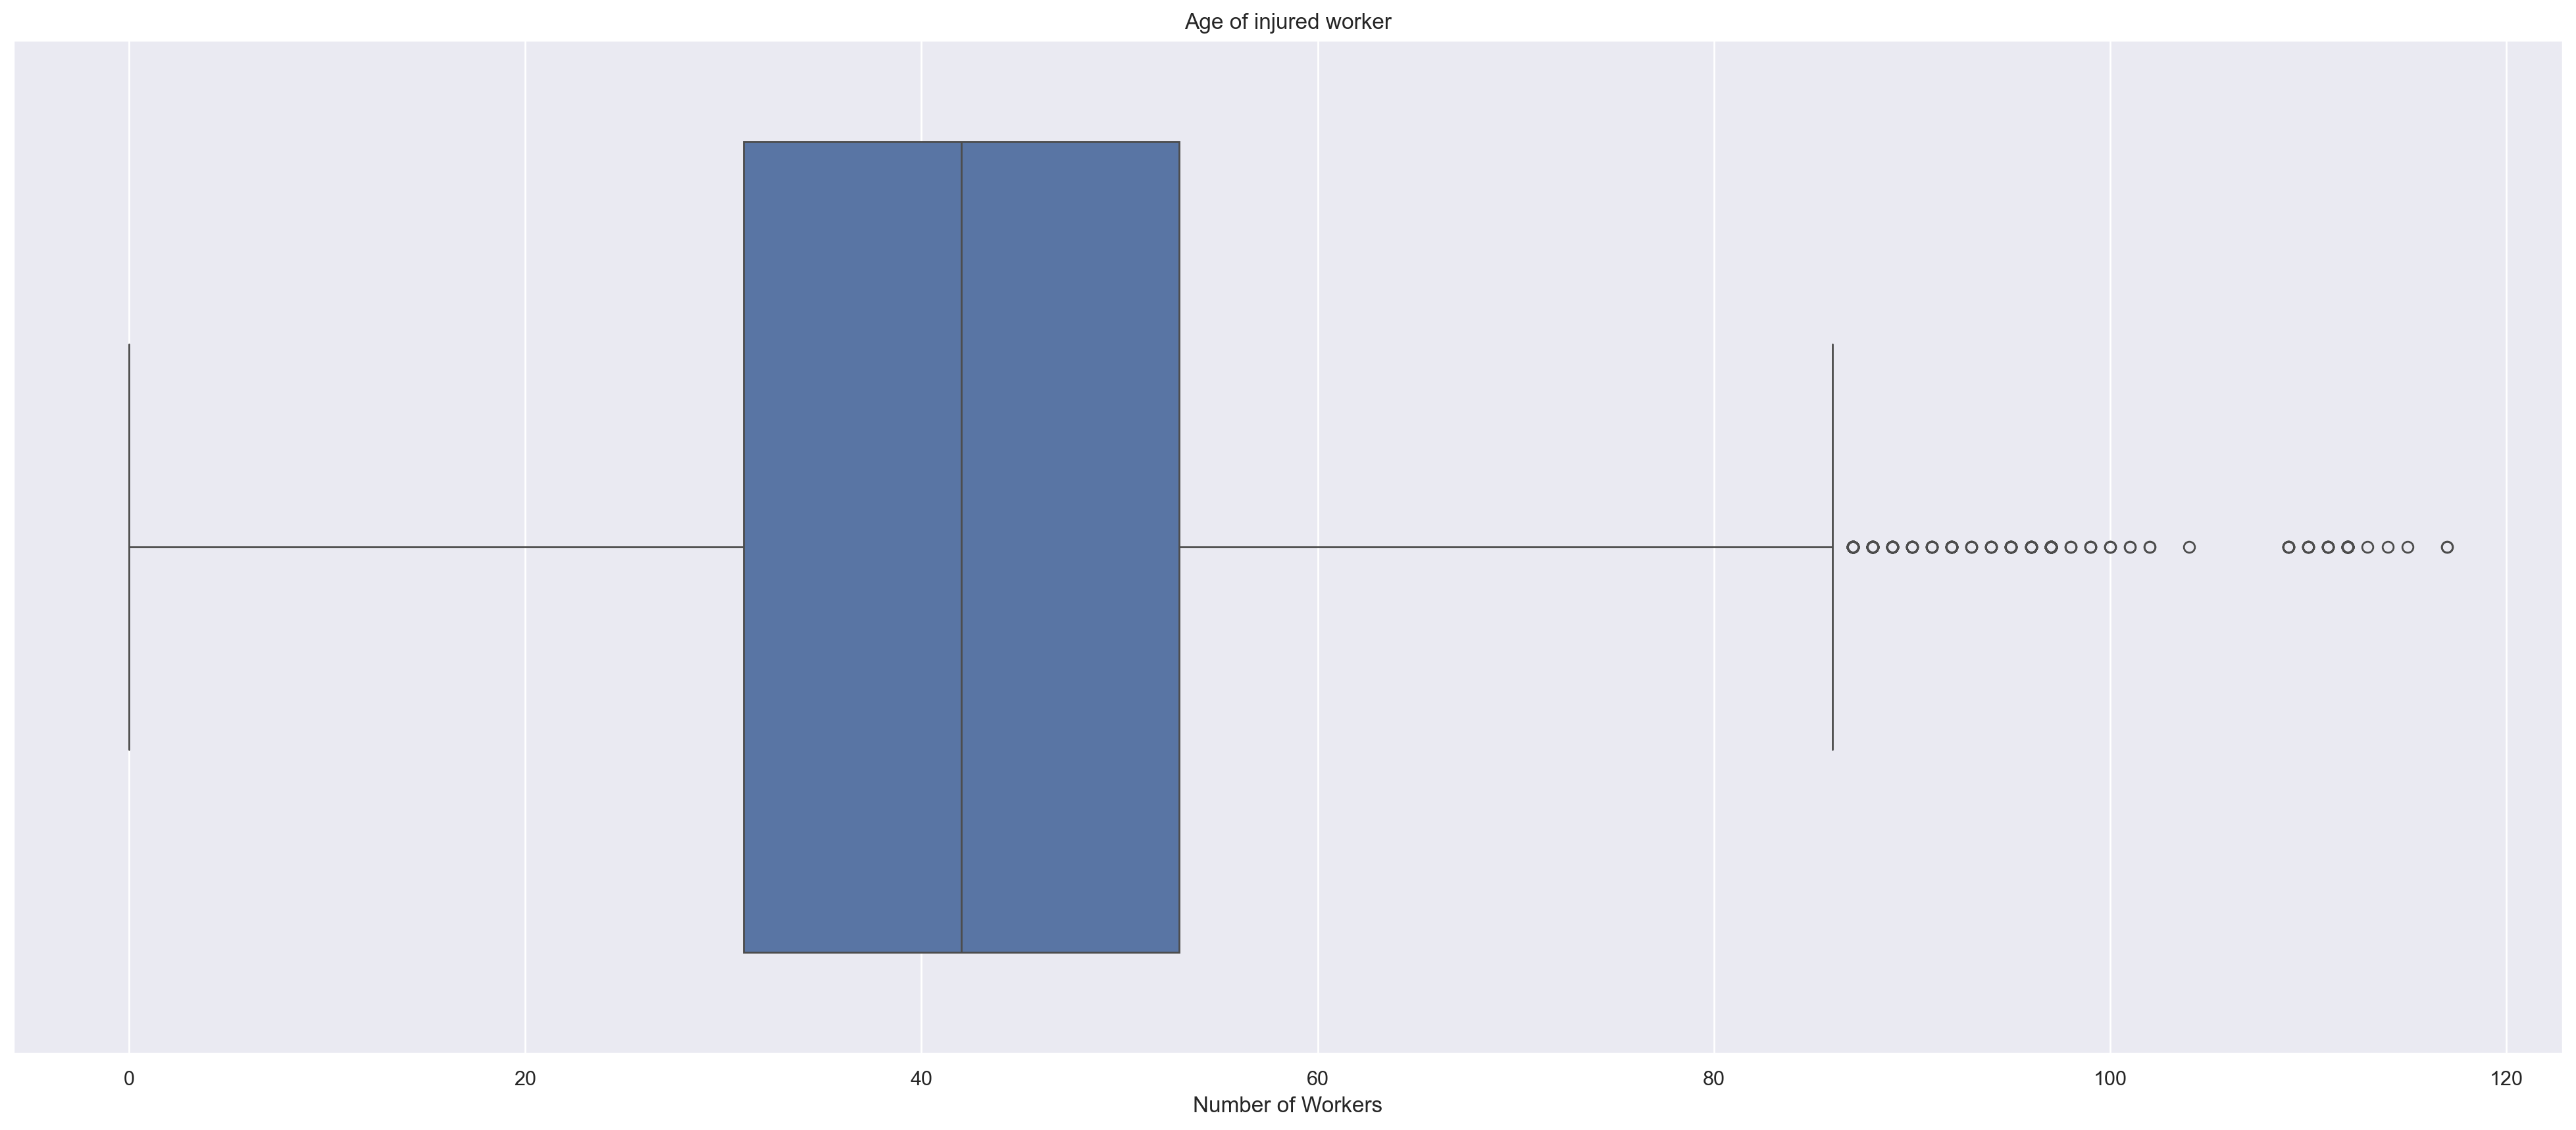

In [50]:
plt.figure(figsize=(25, 10))
sns.boxplot(x=df_train['Age at Injury'])
plt.title('Age of injured worker')
plt.xlabel('Number of Workers')
plt.show()

- As we can see, there are a lot of outliers.

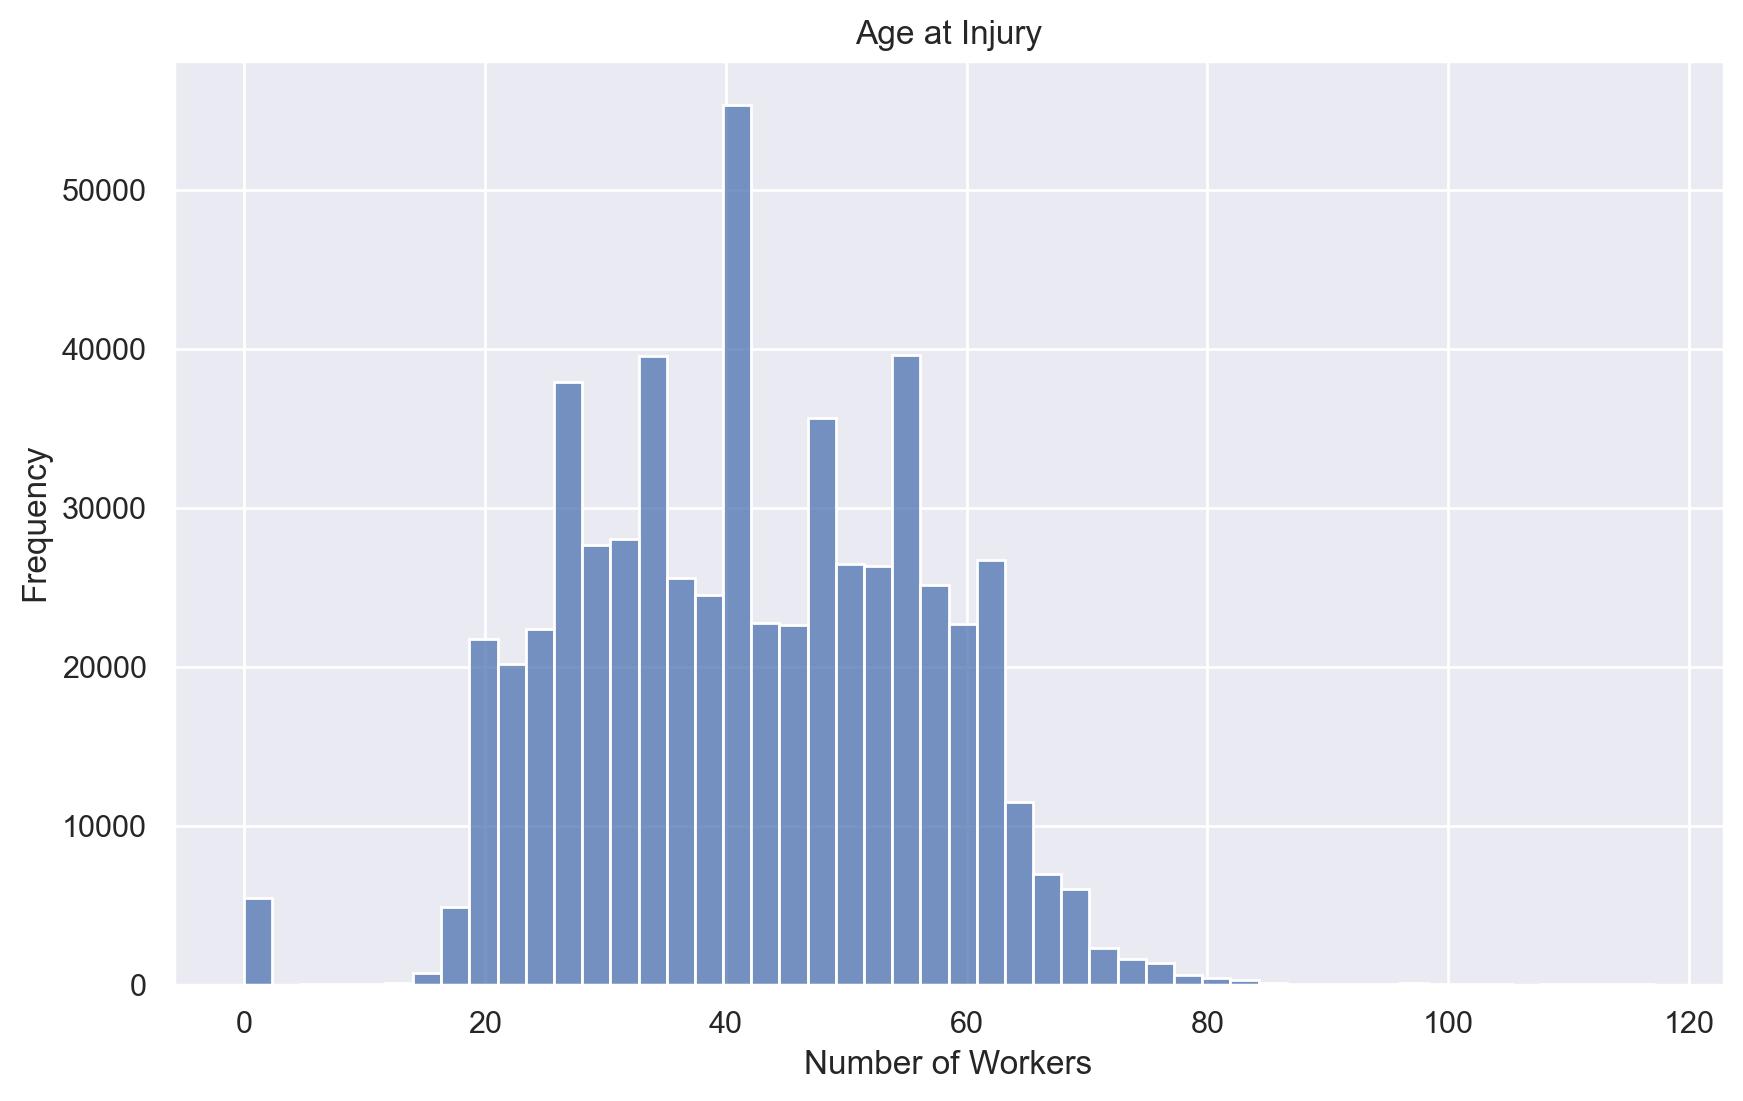

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age at Injury'], bins=50)
plt.title('Age at Injury')
plt.xlabel('Number of Workers', y = -0.2)
plt.ylabel('Frequency')
plt.show()

- The data does not follow a normal distribution.

In [380]:
##### tenho que pensar melhor nisto


def Find_Outliers_IQR(df): 
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1

#Define outliers bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df < lower_bound) | (df> upper_bound)]

    return outliers

In [ ]:
outliers = Find_Outliers_IQR(df_train['Age at Injury'])

print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

outliers

In [ ]:
#Drop the outliers
def Drop_Outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    not_outliers = df[(df >= lower_bound) & (df <= upper_bound)]
    outliers_dropped = outliers.dropna().reset_index()
    return outliers_dropped

In [ ]:
drop_outliers = Drop_Outliers_IQR(df_train['Age at Injury'])
drop_outliers

# 5. Creating New Features 

3.2. New features
We can create multiple new variables in order to try to extract some useful information. Some examples are:

Age gives us the age of the patient, based on the BirthYear and the current year.

__`Step 10`__ Look for correlations between the different features with the method `.corr(method = 'spearman')`

In [ ]:
#compute the correlation matrix of the features
# it is useful to assess multicollinearity (data redundancy) and to identify the most relevant features (more correlated with the target)
drugs_truth.drop(columns = 'DrugPlant').corr(method = 'spearman')

# 4. Modify the data

In [ ]:
# creating an object named X that will contain the independent variables and another object named y that will contain the dependent variable/target

X = df_train.drop('Claim Injury Type', axis = 1)
y = df_train['Claim Injury Type']

In [ ]:
# dividing the X into X_train and X_val, the y into y_train and y_val

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, 
                                                  random_state=0, 
                                                  stratify=y, 
                                                  shuffle=True)

<img src="01_images/phase04.png" alt="Drawing" style="width: 500px;"/>

After the exploration and understanding of data, we need to fix possible problems on data like missing values or outliers and we can create new variables in order to get variables with higher predictive power. <br>
At this moment, we are going to ignore this. <br>However, to create a predictive model we need to identify what are our independent variables and the dependent one (the target), as also we need to split our data into at least two different datasets - the train and the validation.

__`Step 11`__ Create a new dataset named as `X` that will include all the independent variables.

In [ ]:
X = drugs_truth.iloc[:,:-1]

In [ ]:
# or
# X = drugs_truth.drop(columns = 'DrugPlant')

In [ ]:
X

__`Step 12`__ Create a new dataset named as `y` that will include the dependent variable (the last column - DrugPlant)

In [ ]:
y = drugs_truth.iloc[:,-1]

In [ ]:
# or
# y = drugs_truth['DrugPlant']

In [ ]:
y

__`Step 13`__ Using the `train_test_split()`, split the data into train and validation, where the training dataset should contain 70% of the observations. (We are going to talk more about this in a future class). 

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y,
                                                               train_size = 0.7, 
                                                               shuffle = True, 
                                                               stratify = y) # to have the same percentage of 1s in train and test data 

# 5. Modelling - Create a predictive model

It is time to create a model. At this step, we are going to implement a simple algorithm named as "Decision Trees". 

<img src="01_images/phase05.png" alt="Drawing" style="width: 500px;"/>

__`Step 14`__ Create an instance of a DecisionTreeClassifier named as `dt` with the default parameters and fit the instance to the training data (again, we are going to talk more about this later).

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

__`Step 15`__ Using the model just created in the previous step, predict the values of the target in the train dataset using the method `.predict()`. Assign those values to the object `predictions_train`

In [ ]:
predictions_train = dt.predict(X_train)

__`Step 16`__ Similarly to what you have done in the previous step, predict the target values for the validation dataset and assign those values to the object `predictions_val`

In [ ]:
predictions_val = dt.predict(X_validation)

# 6. Assess

We already have the ground truth and the predicted values. In this way we can start evaluating the performance of our model in the train and the validation dataset.

<img src="01_images/phase06.png" alt="Drawing" style="width: 500px;"/>

__`Step 17`__ Using the method `.score()`, check the mean accuracy of the model `dt`in the train dataset.

In [ ]:
dt.score(X_train, y_train)

__`Step 18`__ Similarly to what you have done in step 17, check the mean accuracy now for the validation dataset.

In [ ]:
dt.score(X_validation, y_validation)

Are we dealing with a case of __overfitting__? <br>
Yes, decision trees are known to be prone to overfitting. <br>
Luckily, there are strategies to avoid this problem. <br>
We are going to understand better what is overfitting and how to avoid it in the different algorithms in the next classes.

It is time to check the confusion matrix of the model for the training and the validation dataset. <br> <br>
__`Step 19`__ Check the confusion matrix for the training dataset, passing as parameters the ground truth (y_train) and the predicted values (predictions_train)<br>
[[TN, FP],<br>
[FN. TP]]

In [ ]:
confusion_matrix(y_train, predictions_train)

__`Step 20`__ Do the same for the validation dataset.

In [ ]:
confusion_matrix(y_validation, predictions_val)

__Can we conclude something from the results above?__ <br>It seems that our model is not so good at predicting the 1's in the target. <br>__Why?__ <br>Because we are dealing with an unbalanced dataset (more about this in the future). 

We are going to learn also different metrics that allow to understant better the performance of our model in unbalanced datasets - the mean accuracy is not a good metric to evaluate those cases.

# 7. Deploy

In the end, we want to classify the unclassified data. If we are already satisfied with our model, we can now predict the target to the new dataset.

__`Step 21`__ Check the dataset that we want to classify, imported as `drugs_2classify`

In [ ]:
# test data
drugs_2classify

__`Step 22`__ Using the `.predict()` method and the model created named as `dt`, predict the target on the new dataset and assign those values to a column named as `DrugPlant`

In [ ]:
drugs_2classify['DrugPlant'] = dt.predict(drugs_2classify)

__`Step 23`__ Check the new dataset.

In [ ]:
drugs_2classify

Now we have already predicted the target for our new dataset! Next, if we wish to save a set of predictions, we can export a solution to a csv file.

In [ ]:
#export test data predictions
drugs_2classify['DrugPlant'].to_csv('Exercise1_predictions.csv')